Load Packages

In [38]:
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

Load Dataset and split

In [39]:
# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

SVM Before Feature Selection 

In [40]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Build the model
svm = SVC(kernel='linear', random_state=12, probability=True)  # Set probability=True for ROC-AUC

# Train the model
svm.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = svm.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

from sklearn import metrics

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)


# Output the results

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC: {roc_auc:.4f}")

# Perform n-fold cross-validation
n = 2
cv_scores = cross_val_score(svm, X, Y, cv=n)

# Print cross-validation scores
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())


Accuracy: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC: 0.9583

Cross-validation Scores: [0.91666667 0.88888889]
Mean Cross-validation Accuracy: 0.9027777777777777


RF Before Feature Selection

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=3, random_state=13)

# Train the model
rf.fit(X_train, Y_train)

# Predict the labels for the test set
Y_pred = rf.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

from sklearn import metrics

# Calculate ROC AUC score
roc_auc = metrics.roc_auc_score(Y_test, Y_pred)


# Output the results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC: {roc_auc:.4f}")

# Perform n-fold cross-validation
n = 5
cv_scores = cross_val_score(rf, X, Y, cv=n)

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean Cross-validation Accuracy:", cv_scores.mean())


Accuracy: 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15

Confusion Matrix:
[[11  0]
 [ 2  2]]

ROC-AUC: 0.7500
Cross-validation Scores: [0.86666667 0.66666667 0.57142857 0.78571429 0.78571429]
Mean Cross-validation Accuracy: 0.7352380952380951


Filter Feature Selection techniques for SVM (K features)

In [42]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn import metrics

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

# Apply Min-Max Scaling to ensure non-negative values for Chi-Square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Number of top features to select
k = 250

# Feature Selection Techniques
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_mi = mi_selector.fit_transform(X_train, Y_train)
X_test_mi = mi_selector.transform(X_test)

# F-Score (ANOVA)
f_selector = SelectKBest(score_func=f_classif, k=k)
X_train_f = f_selector.fit_transform(X_train, Y_train)
X_test_f = f_selector.transform(X_test)

# Chi-Square (with scaled data)
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, Y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Function to train and evaluate the model
def evaluate_svm(X_train, X_test, Y_train, Y_test):
    svm = SVC(kernel='linear', random_state=12, probability=True)
    svm.fit(X_train, Y_train)
    Y_pred = svm.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, svm.predict_proba(X_test)[:, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(confusion_matrix(Y_test, Y_pred))
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Perform n-fold cross-validation
    n = 2
    cv_scores = cross_val_score(svm, X_train, Y_train, cv=n)
    print(f"\nCross-validation Scores: {cv_scores}")
    print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

# Evaluate the model using Mutual Information selected features
print("\nEvaluating with Mutual Information Selected Features:")
evaluate_svm(X_train_mi, X_test_mi, Y_train, Y_test)

# Evaluate the model using F-Score selected features
print("\nEvaluating with F-Score Selected Features:")
evaluate_svm(X_train_f, X_test_f, Y_train, Y_test)

# Evaluate the model using Chi-Square selected features
print("\nEvaluating with Chi-Square Selected Features:")
evaluate_svm(X_train_chi2, X_test_chi2, Y_train, Y_test)



Evaluating with Mutual Information Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000

Cross-validation Scores: [0.96551724 0.96428571]
Mean Cross-validation Accuracy: 0.9649

Evaluating with F-Score Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matr

Filter Feature Selection Techniques for RF (K features)


Evaluating with Mutual Information Selected Features:
Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


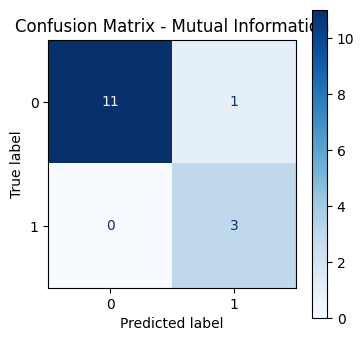


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


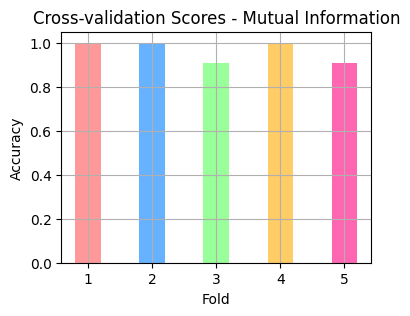

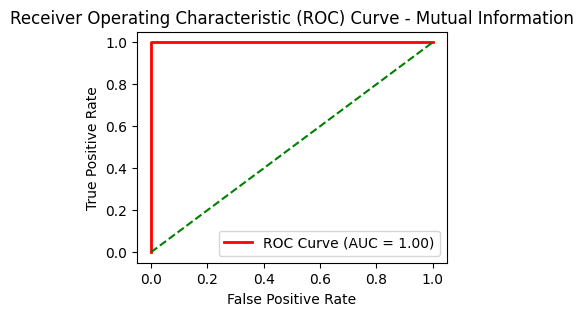


Evaluating with F-Score Selected Features:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

ROC-AUC Score: 1.0000


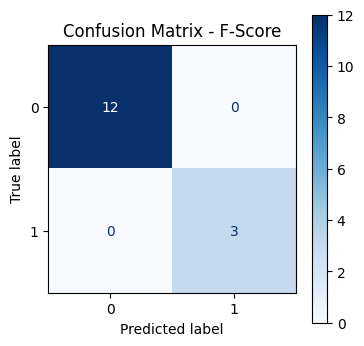


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


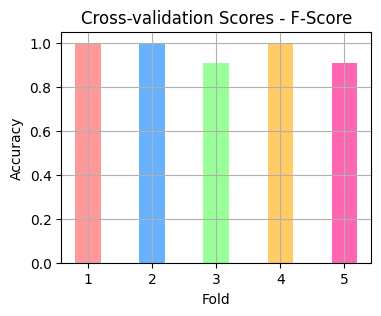

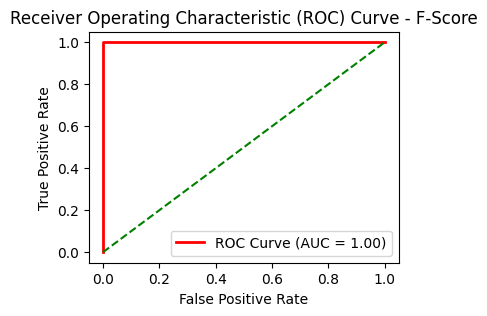


Evaluating with Chi-Square Selected Features:
Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

Confusion Matrix:
[[12  0]
 [ 0  3]]

ROC-AUC Score: 1.0000


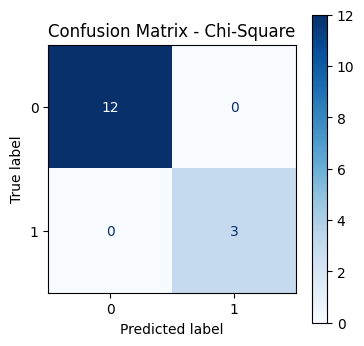


Cross-validation Scores: [1.         1.         0.90909091 1.         0.90909091]
Mean Cross-validation Accuracy: 0.9636


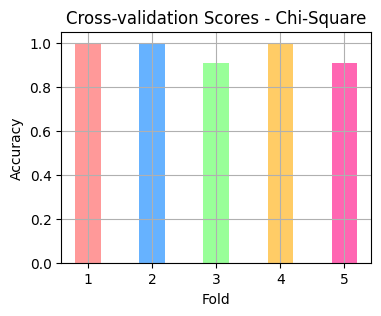

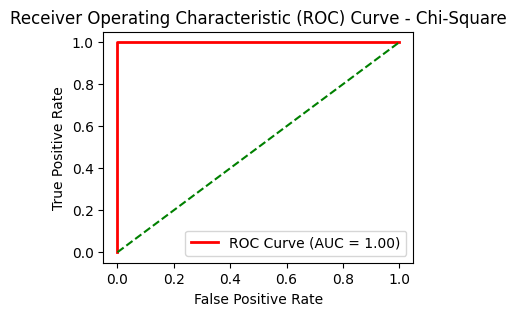

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, chi2
from sklearn import metrics
import matplotlib.pyplot as plt

# Set the seed for reproducibility across NumPy random operations
np.random.seed(1111)

# Load the dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values  # Features
Y = df.iloc[:, -1].values   # Labels

# Convert categorical labels to binary labels
le = LabelEncoder()
Y = le.fit_transform(Y)  # Encode 'ALL' as 0 and 'AML' as 1

# Apply Min-Max Scaling to ensure non-negative values for Chi-Square
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Number of top features to select
k = 250

# Feature Selection Techniques
# Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_mi = mi_selector.fit_transform(X_train, Y_train)
X_test_mi = mi_selector.transform(X_test)

# F-Score (ANOVA)
f_selector = SelectKBest(score_func=f_classif, k=k)
X_train_f = f_selector.fit_transform(X_train, Y_train)
X_test_f = f_selector.transform(X_test)

# Chi-Square (with scaled data)
chi2_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi2_selector.fit_transform(X_train, Y_train)
X_test_chi2 = chi2_selector.transform(X_test)

# Function to train, evaluate the Random Forest model, plot confusion matrix, cross-validation scores, and ROC-AUC curve
def evaluate_rf(X_train, X_test, Y_train, Y_test, feature_name):
    rf = RandomForestClassifier(n_estimators=100, random_state=12)
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test)[:, 1])

    print(f"\nEvaluating with {feature_name} Selected Features:")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    print(conf_matrix)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Plot the confusion matrix with a smaller size
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjusted to smaller size
    disp.plot(cmap='Blues', ax=ax)
    plt.title(f'Confusion Matrix - {feature_name}')
    plt.show()

    # Perform n-fold cross-validation
    n = 5
    cv_scores = cross_val_score(rf, X_train, Y_train, cv=n)
    print(f"\nCross-validation Scores: {cv_scores}")
    print(f"Mean Cross-validation Accuracy: {cv_scores.mean():.4f}")

    # Plot Cross-validation Scores as a smaller and more stylish bar plot
    plt.figure(figsize=(4, 3))  # Smaller plot size
    bar_width = 0.4  # Reduced bar width for a thinner appearance
    colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC66', '#FF66B2']  # Custom color palette
    plt.bar(range(1, n + 1), cv_scores, color=colors[:n], width=bar_width)
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'Cross-validation Scores - {feature_name}')
    plt.ylim(0, 1.05)  # Limit y-axis to 0-1.05 for accuracy scores
    plt.grid(True)
    plt.show()

    # Plot ROC Curve with a smaller size
    plt.figure(figsize=(4, 3))  # Adjusted to smaller size
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, rf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='red', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {feature_name}')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the model using Mutual Information selected features
evaluate_rf(X_train_mi, X_test_mi, Y_train, Y_test, 'Mutual Information')

# Evaluate the model using F-Score selected features
evaluate_rf(X_train_f, X_test_f, Y_train, Y_test, 'F-Score')

# Evaluate the model using Chi-Square selected features
evaluate_rf(X_train_chi2, X_test_chi2, Y_train, Y_test, 'Chi-Square')


Wrapper Feature Selection for SVM using RFE:

In [44]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=14)

# Build the SVM model
svm = SVC(kernel='linear', random_state=12, probability=True)

# Initialize RFE with SVM as the estimator and select top K features
k = 250  # Number of top features to select
rfe_svm = RFE(estimator=svm, n_features_to_select=k, step=1)

# Fit RFE
rfe_svm.fit(X_train, Y_train)

# Transform the data using the selected features
X_train_rfe = rfe_svm.transform(X_train)
X_test_rfe = rfe_svm.transform(X_test)

# Train SVM using selected features
svm.fit(X_train_rfe, Y_train)

# Make predictions and evaluate performance
Y_pred = svm.predict(X_test_rfe)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, svm.predict_proba(X_test_rfe)[:, 1])

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.9333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.88      0.96      0.91        15
weighted avg       0.95      0.93      0.94        15

Confusion Matrix:
[[11  1]
 [ 0  3]]

ROC-AUC Score: 1.0000


Wrapper Feature Selection for Random Forest using RFE:

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# Build the Random Forest model
rf = RandomForestClassifier(n_estimators=3, random_state=13)

# Initialize RFE with Random Forest as the estimator and select top K features
k = 250  # Number of top features to select
rfe_rf = RFE(estimator=rf, n_features_to_select=k, step=1)

# Fit RFE
rfe_rf.fit(X_train, Y_train)

# Transform the data using the selected features
X_train_rfe = rfe_rf.transform(X_train)
X_test_rfe = rfe_rf.transform(X_test)

# Train Random Forest using selected features
rf.fit(X_train_rfe, Y_train)

# Make predictions and evaluate performance
Y_pred = rf.predict(X_test_rfe)

# Calculate metrics
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, rf.predict_proba(X_test_rfe)[:, 1])

# Output the results
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))
print(f"\nROC-AUC Score: {roc_auc:.4f}")


Accuracy: 0.8667

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.50      0.67         4

    accuracy                           0.87        15
   macro avg       0.92      0.75      0.79        15
weighted avg       0.89      0.87      0.85        15

Confusion Matrix:
[[11  0]
 [ 2  2]]

ROC-AUC Score: 0.9318


Wrapper Feature Selection for SVM and RF using Genetic Algorithm (GA):

In [51]:
from deap import base, creator, tools, algorithms
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define evaluation function
def evaluate(individual, X_train, Y_train, X_test, Y_test, model):
    selected_features = [i for i, val in enumerate(individual) if val]
    if len(selected_features) == 0:
        return (0,)  # Return zero if no features are selected
    
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    model.fit(X_train_selected, Y_train)
    Y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    return (accuracy,)

# Function to print performance metrics
def print_metrics(X_train, Y_train, X_test, Y_test, best_individual, model):
    selected_features = [i for i, val in enumerate(best_individual) if val]
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]
    
    model.fit(X_train_selected, Y_train)
    Y_pred = model.predict(X_test_selected)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    classification_rep = classification_report(Y_test, Y_pred)
    confusion_mat = confusion_matrix(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test_selected)[:, 1])
    
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_rep)
    print("Confusion Matrix:")
    print(confusion_mat)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Setup Genetic Algorithm for SVM
def run_ga_svm(X_train, Y_train, X_test, Y_test):
    # Check and delete previous definitions if they exist
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1])
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, model=SVC(kernel='linear', random_state=12, probability=True))
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Setup Genetic Algorithm for Random Forest
def run_ga_rf(X_train, Y_train, X_test, Y_test):
    # Check and delete previous definitions if they exist
    if "FitnessMax" in creator.__dict__:
        del creator.FitnessMax
    if "Individual" in creator.__dict__:
        del creator.Individual
    
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    
    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=X_train.shape[1])
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X_train=X_train, Y_train=Y_train, X_test=X_test, Y_test=Y_test, model=RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1))
    toolbox.register("mate", tools.cxUniform, indpb=0.5)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    
    population = toolbox.population(n=50)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=10, verbose=True)
    
    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Load dataset
df = pd.read_csv('binary.arff.csv')

# Split data into X (features) and Y (target)
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test data (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=14)

# Run GA for SVM
print("Running GA for SVM...")
best_individual_svm = run_ga_svm(X_train, Y_train, X_test, Y_test)
print("Best Individual for SVM:", best_individual_svm)

# Print metrics for SVM
print("\nPerformance Metrics for SVM:")
print_metrics(X_train, Y_train, X_test, Y_test, best_individual_svm, SVC(kernel='linear', random_state=12, probability=True))

# Run GA for Random Forest
print("\nRunning GA for Random Forest...")
best_individual_rf = run_ga_rf(X_train, Y_train, X_test, Y_test)
print("Best Individual for RF:", best_individual_rf)

# Print metrics for Random Forest
print("\nPerformance Metrics for Random Forest:")
print_metrics(X_train, Y_train, X_test, Y_test, best_individual_rf, RandomForestClassifier(n_estimators=100, random_state=13, n_jobs=-1))


Running GA for SVM...
gen	nevals
0  	50    
1  	27    
2  	31    
3  	45    
4  	32    
5  	29    
6  	37    
7  	26    
8  	30    
9  	29    
10 	29    
Best Individual for SVM: [1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0

Plotting in Graph

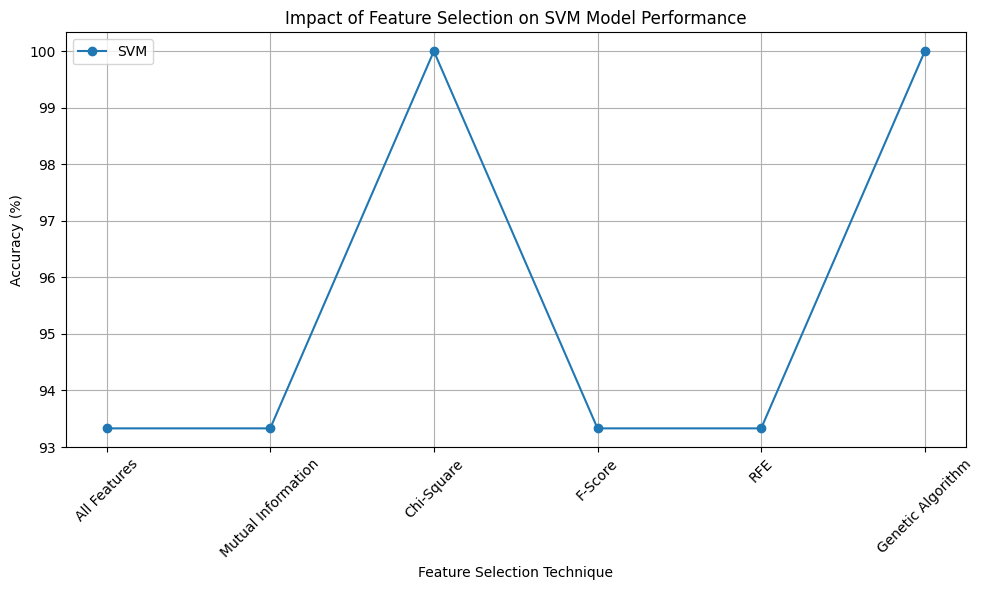

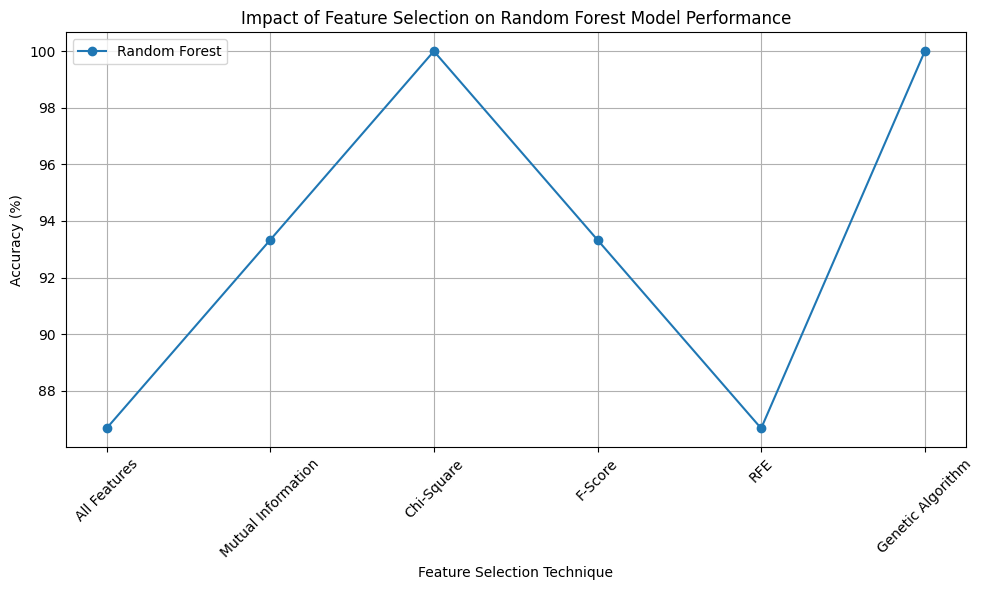

In [54]:
import matplotlib.pyplot as plt

# Example data preparation: Replace with your actual dataset and feature selection results
techniques = ["All Features", "Mutual Information", "Chi-Square", "F-Score", "RFE", "Genetic Algorithm"]

# Replace these with your actual accuracies (in percentage)
# Single accuracy before feature selection
accuracy_before_selection_svm = 93.33  # Example percentage value for SVM before feature selection
accuracy_before_selection_rf = 86.67   # Example percentage value for RF before feature selection

# Accuracies after feature selection (in percentage)
accuracy_after_selection_svm = [93.33, 100, 93.33, 93.33, 100]  # Example percentage values after feature selection for SVM
accuracy_after_selection_rf = [93.33, 100, 93.33, 86.67 , 100]   # Example percentage values after feature selection for RF

# Insert the "All Features" accuracy at the beginning of the list for each model
accuracies_svm = [accuracy_before_selection_svm] + accuracy_after_selection_svm
accuracies_rf = [accuracy_before_selection_rf] + accuracy_after_selection_rf

# Plotting the accuracies for SVM and Random Forest models
def plot_accuracies(model_name, techniques, accuracies):
    plt.figure(figsize=(10, 6))
    
    # Plotting the accuracies
    plt.plot(techniques, accuracies, label=f'{model_name}', marker='o', linestyle='-')
    
    # Adding labels and title
    plt.title(f'Impact of Feature Selection on {model_name} Model Performance')
    plt.xlabel('Feature Selection Technique')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot for SVM
plot_accuracies('SVM', techniques, accuracies_svm)

# Plot for Random Forest
plot_accuracies('Random Forest', techniques, accuracies_rf)
